<a href="https://colab.research.google.com/github/gnoejh/ict1022/blob/main/Components/normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Components of Neural Networks

## Normalization in Neural Networks

This presentation covers various normalization techniques in neural networks, their motivations, and implementations.

## Normalization Techniques

### Batch Normalization

- Normalizes the inputs across the batch.
- Commonly used in CNNs and fully-connected networks.

### Layer Normalization

- Normalizes across the features in a layer.
- Particularly effective for RNNs.

### Instance & Group Normalization

- Instance Normalization: Normalizes each sample individually.
- Group Normalization: Divides channels into groups and normalizes within each group.

These techniques help reduce the sensitivity of the network to initialization and learning rates.

## Normalization Mathematical Formulations

**Batch Normalization:**

Given a batch ${\{x^{(1)}, \dots, x^{(m)}\}}$: 

$$
\mu_B = \frac{1}{m}\sum_{i=1}^{m} x^{(i)}, \quad \sigma_B^2 = \frac{1}{m}\sum_{i=1}^{m}\left(x^{(i)}-\mu_B\right)^2
$$

Normalized output:

$$
\hat{x}^{(i)} = \frac{x^{(i)}-\mu_B}{\sqrt{\sigma_B^2+\epsilon}}
$$

**Layer Normalization:**

Given features ${\{x_1, x_2, \dots, x_d\}}$ for a sample:

$$
\mu = \frac{1}{d}\sum_{j=1}^{d}x_j, \quad \sigma^2 = \frac{1}{d}\sum_{j=1}^{d}\left(x_j-\mu\right)^2
$$

Normalized features:

$$
\hat{x}_j = \frac{x_j-\mu}{\sqrt{\sigma^2+\epsilon}}
$$

**Instance & Group Normalization:** Similar formulas apply by computing statistics per instance or per group.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.765483..1.7500521].


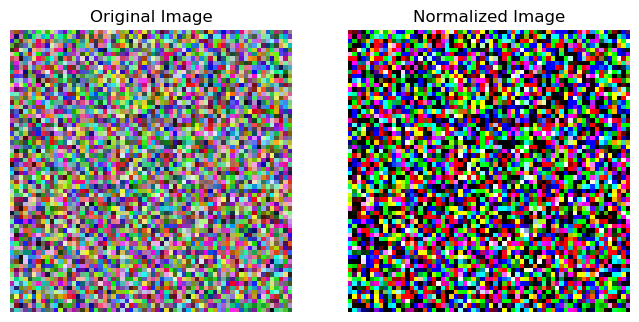

In [5]:
# Example: Displaying an image before and after Batch Normalization
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Create a dummy image with shape (batch, channels, height, width)
img = torch.rand(1, 3, 64, 64)  # dummy image

# Define BatchNorm2d for 3 channels
bn = nn.BatchNorm2d(3)

# Normalize the image
img_norm = bn(img)

# Convert tensors to NumPy arrays for display
img_np = img.squeeze(0).permute(1, 2, 0).detach().numpy()
img_norm_np = img_norm.squeeze(0).permute(1, 2, 0).detach().numpy()

# Plot the original and normalized images side by side
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(img_np)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(img_norm_np)
axes[1].set_title("Normalized Image")
axes[1].axis("off")

plt.show()